In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [4]:
df = pd.read_csv('kc_house_data.csv')

In [5]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [7]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [8]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

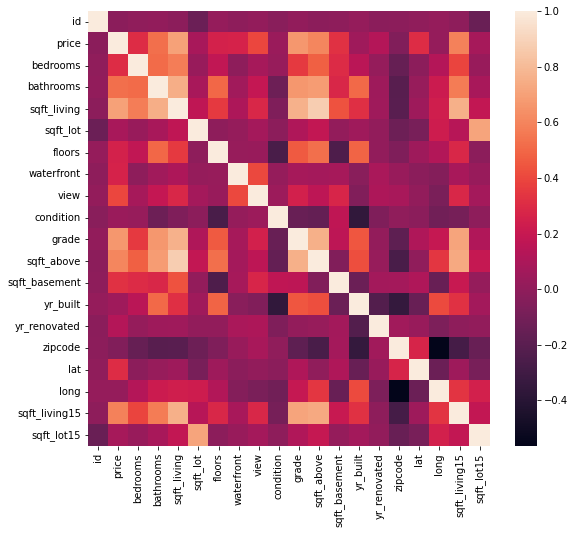

In [9]:
plt.figure(figsize=(9,8))
sns.heatmap(df.corr())

In [10]:
pd.DataFrame(df.corr()['price']).sort_values(by='price',ascending=False)

,price
price,1.000000
sqft_living,0.702035
grade,0.667434
sqft_above,0.605567
sqft_living15,0.585379
bathrooms,0.525138
view,0.397293
sqft_basement,0.323816
bedrooms,0.308350
lat,0.307003


The most important feature that are closely in a linear relationship with our target:price are: sqft_living,grade,sqft_living15

# Linear Regression Model

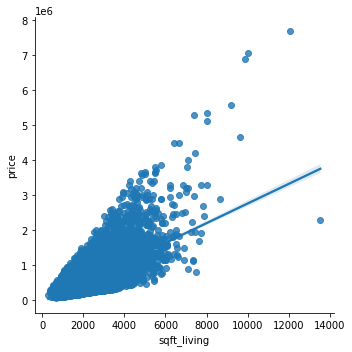

In [11]:
sns.lmplot(x='sqft_living',y='price',data=df)

In [12]:
input_data = df['sqft_living'].values[:,np.newaxis]
output_data = df['price'].values

In [13]:
from sklearn.model_selection import train_test_split
#split our data to a train and test splits using train_test_split
X_train,X_test,y_train,y_test = train_test_split(input_data,output_data,test_size=0.2,random_state=42)

In [14]:
#import our LinearRegression Model
from sklearn.linear_model import LinearRegression
#Instantiate our model 
model1 = LinearRegression()
#let's train our first model  
model1.fit(X_train,y_train)

LinearRegression()

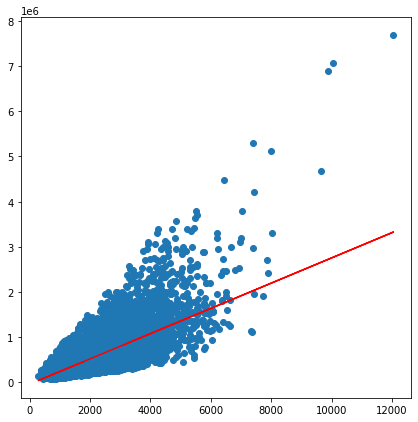

In [15]:
plt.figure(figsize=(7,7))
plt.scatter(X_train,y_train)
plt.plot(X_train,model1.predict(X_train),"r")

In [16]:
#model evaluation
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
#step 1 : make a prediction on the test_data
prediction1=model1.predict(X_test)
#MAE
MAE = mean_absolute_error(y_test,prediction1)
#MSE
MSE = mean_squared_error(y_test,prediction1)
#R_squared
r2 = r2_score(y_test,prediction1)

print("MAE :{:.4f}".format(MAE))
print("MSE :{:.4f}".format(MSE))
print("R2_score :{:.2f}".format(r2))

MAE :177867.5403
MSE :76484977061.7761
R2_score :0.49


The MSE is high.The R squared equal to 0.49 means that half of the output "Price" can be explained by the model's input.

#  Multi-Linear Regression :top 3 most correlated features with our target "Price"

In [17]:
input_data2 = df[['sqft_living','grade','sqft_above']]
print(input_data2)

       sqft_living  grade  sqft_above
0             1180      7        1180
1             2570      7        2170
2              770      6         770
3             1960      7        1050
4             1680      8        1680
...            ...    ...         ...
21608         1530      8        1530
21609         2310      8        2310
21610         1020      7        1020
21611         1600      8        1600
21612         1020      7        1020

[21613 rows x 3 columns]


In [18]:
#split our data to a train and test splits using train_test_split
X_train,X_test,y_train,y_test = train_test_split(input_data2,output_data,test_size=0.2,random_state=42)

In [19]:
#Instantiate our model 
model2 = LinearRegression()
model2.fit(X_train,y_train)

LinearRegression()

In [20]:
#step 1 : make a prediction on the test_data
prediction1=model2.predict(X_test)
#MAE
MAE = mean_absolute_error(y_test,prediction1)
#MSE
MSE = mean_squared_error(y_test,prediction1)
#R_squared
r2 = r2_score(y_test,prediction1)

print("MAE :{:.2f}".format(MAE))
print("MSE :{:.2f}".format(MSE))
print("R2_score :{:.2f}".format(r2))

MAE :165848.98
MSE :68993350911.74
R2_score :0.54


the Error has lightly decreased and the score has been improved which means that the model is quite good comparing the first one.

# Polynomial Regression

In [21]:
from sklearn.preprocessing import PolynomialFeatures

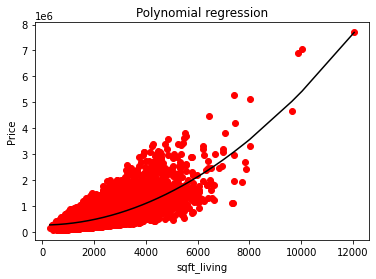

In [51]:
input_data = df['sqft_living'].values[:,np.newaxis]
X_train,X_test,y_train,y_test = train_test_split(input_data,output_data,test_size=0.2,random_state=42)
#Instantiate our PolynomialFeatures Generator
poly = PolynomialFeatures(degree = 2) 
#Transform our input Data
x_poly = poly.fit_transform(X_train) 
poly.fit(x_poly, y_train) 
lg=LinearRegression()
lg.fit(x_poly, y_train) 

plt.scatter(X_train, y_train, color="r")
plt.title("Polynomial regression")
plt.ylabel("Price")
plt.xlabel("sqft_living")
import operator
sort_axis = operator.itemgetter(0)
y_poly_pred = lg.predict(x_poly)
sorted_zip = sorted(zip(X_train,y_poly_pred), key=lambda elem: elem[0])
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x, y_poly_pred, color="k") 


In [47]:
y_test.shape

(4323,)

In [60]:
from sklearn import metrics
#define metrics
y_pred_proba = lg.predict(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

ValueError: ignored

In [23]:
x_poly.shape

(17290, 3)

In [24]:
X_train.shape

(17290, 1)

In [25]:
c=np.array(y_poly_pred)
print(c)

[ 270862.32777318  274060.92304124  274506.31728465 ... 5282158.5950532
 5434511.08094944 7695863.27553901]


In [31]:
k=np.divide(c, X_train)

In [30]:
k.shape

(17290, 17290)

In [61]:
r2 = r2_score(y_test,y_poly_pred)
print(r2)

ValueError: ignored